# Malaysia Restaurant Review Datasets

## Source
The datasets are restaurant reviews datasets collected from Google reviews and TripAdvisor. The reviews were collected from the top restaurants in Malaysia across various states and cities. __[Kaggle](https://www.kaggle.com/datasets/choonkhonng/malaysia-restaurant-review-datasets)__

In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving TripAdvisor_data_cleaned.csv to TripAdvisor_data_cleaned.csv


In [3]:
#load the restaurant in csv file using the relevant file
malay_reviews = pd.read_csv('TripAdvisor_data_cleaned.csv')
malay_reviews.head(3)

,Author,Title,Review,Rating,Dates,Restaurant,Location
0,kmc1e2018,Chambers Bar and Grill,"David, Thanga, Mikail and Chef Steven gave bri...",5.0,Reviewed yesterday,Chambers Grill,KL
1,"MizOthmanKuala Lumpur, Malaysia",Always a pleasure. Place to celebrate.,We visited for family celebration and as usual...,5.0,Reviewed 5 days ago,Chambers Grill,KL
2,"Relax36268533224Hjarno, Denmark",Enjoying good service and good food after a lo...,Perfect dinner after a long journey.After trav...,5.0,Reviewed 1 week ago,Chambers Grill,KL


In [4]:
malay_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139764 entries, 0 to 139763
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Author      139764 non-null  object 
 1   Title       139764 non-null  object 
 2   Review      139764 non-null  object 
 3   Rating      139764 non-null  float64
 4   Dates       139764 non-null  object 
 5   Restaurant  139764 non-null  object 
 6   Location    139764 non-null  object 
dtypes: float64(1), object(6)
memory usage: 7.5+ MB


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Head and selecting columns

In [6]:
#selecting columns for the analysis
malay_reviews_2 = malay_reviews[['Title','Rating','Review']]
malay_reviews_2.head(3)

,Title,Rating,Review
0,Chambers Bar and Grill,5.0,"David, Thanga, Mikail and Chef Steven gave bri..."
1,Always a pleasure. Place to celebrate.,5.0,We visited for family celebration and as usual...
2,Enjoying good service and good food after a lo...,5.0,Perfect dinner after a long journey.After trav...


### Combine title and review columns

In [7]:
#the title and reviews columns are relevant and will be joined together
malay_reviews_2['New_Reviews'] = malay_reviews_2['Title'] + '. ' + malay_reviews_2['Review']
malay_reviews_2 = malay_reviews_2[['Rating','New_Reviews']]
malay_reviews_2.head(10)

,Rating,New_Reviews
0,5.0,"Chambers Bar and Grill. David, Thanga, Mikail ..."
1,5.0,Always a pleasure. Place to celebrate.. We vis...
2,5.0,Enjoying good service and good food after a lo...
3,5.0,Great Steak for Couples. Had a great Tomahawk ...
4,5.0,Dining. Excellent ambient. Excellent service b...
5,5.0,Excellent night.. Come here with a group of cl...
6,5.0,Chambers Grill. Amazing food and hospitality b...
7,5.0,"Chambers Grill. Kudos to David, Azzu, Chef Ste..."
8,5.0,"Nice tomahawk. Food was awesome. David, Aziz, ..."
9,5.0,Excellent food with extremely friendly staffs....


### Checking for Null Values

In [8]:
malay_reviews_2.isnull().sum()

Rating         0
New_Reviews    0
dtype: int64

__No nan values__

In [9]:
malay_reviews_2.dropna(inplace=True)

In [10]:
malay_reviews_2.isnull().sum()

Rating         0
New_Reviews    0
dtype: int64

In [11]:
malay_reviews_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139764 entries, 0 to 139763
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Rating       139764 non-null  float64
 1   New_Reviews  139764 non-null  object 
dtypes: float64(1), object(1)
memory usage: 2.1+ MB


### Checking for Duplicates

In [12]:
#total number of duplicates
malay_reviews_2.duplicated().sum()

1259

In [13]:
#show all rows where there are duplicates
malay_reviews_2[malay_reviews_2.duplicated(keep=False) == True]

,Rating,New_Reviews
1894,5.0,Excellent service and fresh food.. Salmon bell...
1895,5.0,Food and Dinner Set. The food is amazing and t...
1896,5.0,Favorite Japanese restaurant. Favorite Japanes...
1897,5.0,Excellent. Staff is friendly with good service...
1898,5.0,"Lunch Set. Comfortable environment, delicious ..."
1899,4.0,Valentine’s Day Dinner. Made advance booking t...
1900,5.0,Good Food and Service. Visited this restaurant...
1901,5.0,Recommend Japanese Food. They having free park...
1902,5.0,Nice Sashimi. Salmon is very nice! beef textur...
1903,5.0,Anniversary date. Place is comfort and conveni...


In [14]:
#remove duplicates
malay_reviews_2 = malay_reviews_2.drop_duplicates(keep='first')

In [15]:
malay_reviews_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138505 entries, 0 to 139763
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Rating       138505 non-null  float64
 1   New_Reviews  138505 non-null  object 
dtypes: float64(1), object(1)
memory usage: 3.2+ MB


### Checking whether for duplicate New_Reviews, there is same Ratingss

In [16]:
dup_data = malay_reviews_2.loc[malay_reviews_2.duplicated(subset = ['New_Reviews'], keep = False), :].sort_values('New_Reviews')
dup_data

,Rating,New_Reviews
39291,5.0,"A ""bite"" of Italy. I went to Monnalisa on the ..."
39316,4.0,"A ""bite"" of Italy. I went to Monnalisa on the ..."


### Length of Words in a Review

In [17]:
# Length of word in sentence
malay_reviews_2['Review_Length'] = malay_reviews_2['New_Reviews'].apply(len)
malay_reviews_2.head()

,Rating,New_Reviews,Review_Length
0,5.0,"Chambers Bar and Grill. David, Thanga, Mikail ...",129
1,5.0,Always a pleasure. Place to celebrate.. We vis...,317
2,5.0,Enjoying good service and good food after a lo...,338
3,5.0,Great Steak for Couples. Had a great Tomahawk ...,253
4,5.0,Dining. Excellent ambient. Excellent service b...,125


## TEXT PREPROCESSING

In [18]:
from nltk.tokenize import word_tokenize
import re

In [19]:
#reviews head
malay_reviews_3 = malay_reviews_2.copy()
malay_reviews_3.head()

,Rating,New_Reviews,Review_Length
0,5.0,"Chambers Bar and Grill. David, Thanga, Mikail ...",129
1,5.0,Always a pleasure. Place to celebrate.. We vis...,317
2,5.0,Enjoying good service and good food after a lo...,338
3,5.0,Great Steak for Couples. Had a great Tomahawk ...,253
4,5.0,Dining. Excellent ambient. Excellent service b...,125


## Expanding contractions

In [20]:
#viewing the texts
print (malay_reviews_3['New_Reviews'][0])
print('-----------------------------------------------------------------------------------------------------------------')
print (malay_reviews_3['New_Reviews'][1])
print('-----------------------------------------------------------------------------------------------------------------')
print (malay_reviews_3['New_Reviews'][2])

Chambers Bar and Grill. David, Thanga, Mikail and Chef Steven gave brilliant service and the food was excellent. Would recommend!
-----------------------------------------------------------------------------------------------------------------
Always a pleasure. Place to celebrate.. We visited for family celebration and as usual the restaurant doesn’t disappoint. My boys loves the bread and the staff obliged in giving them 2nd servings. Thanks to David, Chef Aiman and esp Thanga who served us diligently despite being busy with many customers at that time.
-----------------------------------------------------------------------------------------------------------------
Enjoying good service and good food after a long journey. Perfect dinner after a long journey.After travelling from DK to Kuala Lumpur if was very nice to arrive to Hilton and to have dinner at Chambers Bar&Grill.Perfect service from David and Thanga and very good steak etc prepared by Chef Aiman. I will for sure visit tha

__Finding contractions in the dataset__

In [21]:
#Expanding contractions using re module
contractions_re = re.compile(r"\b\w+(?:'\w+)+\b")
contractions = set(re.findall(contractions_re, ' '.join(malay_reviews_3['New_Reviews'])))

__Dealing with the contractions__

In [33]:
import contractions

# Define a function to expand contractions
def expand_contractions(text):
    return contractions.fix(text)

#Using the function on the 'New_Reviews' column
malay_reviews_3['New_Reviews_1'] = malay_reviews_3['New_Reviews'].apply(expand_contractions)

## lower casing

In [34]:
malay_reviews_3['Text_Lower'] = malay_reviews_3['New_Reviews_1'].str.lower()

In [35]:
malay_reviews_3['New_Reviews_1'][30]

'Chamber Grill. Excellent grill and service by staff Adli, Azu and David! Food was great especially the River Prawn superb! Will be back again.'

In [36]:
malay_reviews_3['Text_Lower'][30]

'chamber grill. excellent grill and service by staff adli, azu and david! food was great especially the river prawn superb! will be back again.'

## Removing URLS and HTML Tags

In [37]:
def remove_urls_html(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    return text

In [38]:
malay_reviews_3['Reviews_no_url'] = malay_reviews_3['Text_Lower'].apply(lambda x: remove_urls_html(x))

## Dealing with emojis

In [39]:
def nonascii_set(df):
    import string
    punct = set(string.punctuation)  #Gives all the punctuations
    nonascii = set()
    for text in df['Reviews_no_url'].astype(str):
        for word in text:
            if word.isdigit() or word.isalpha() or word.isalnum() or word.isspace():
                continue
            else:
                nonascii.add(word)
    return nonascii

In [40]:
def remove_emoji_symbols(string):
    pattern = re.compile("["
                         u"\U0001F600-\U0001F64F"  # emoticons
                         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                         u"\U0001F680-\U0001F6FF"  # transport & map symbols
                         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                         u"\U00002702-\U000027B0"  # other miscellaneous symbols
                         u"\U000024C2-\U0001F251"  # enclosed characters
                         u"\U000E0020-\U000E007F"  # tags
                         u"\U0001F6A9"  # no entry sign
                         u"\U0001F919"  # zipper-mouth face
                         u"\U0001F4A9"  # pile of poo
                         u"\U0001F4AF"  # hundred points
                         u"\u200d"  # zero width joiner
                         u"\u2640-\u2642"  # gender symbols
                         u"\u2600-\u26FF\u2700-\u27BF"  # various symbols
                         u"\U0001F600-\U0001F64F\u2700-\u27BF"  # emoticons + various symbols
                         u"\ufe0f"  # variation selector-16
                           "]+", flags=re.UNICODE)
    return pattern.sub(r'', string)

In [41]:
malay_reviews_3['Reviews_no_emoji'] = malay_reviews_3['Reviews_no_url'].apply(remove_emoji_symbols)

In [42]:
def remove_special_chars(text):
    # Remove emojis
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [43]:
malay_reviews_3['Reviews_no_emoji'] = malay_reviews_3['Reviews_no_emoji'].apply(lambda x: remove_special_chars(x))

In [44]:
def nonascii_set(df):
    import string
    punct = set(string.punctuation)  #Gives all the punctuations
    nonascii = set()
    for text in df['Reviews_no_emoji'].astype(str):
        for word in text:
            if word.isdigit() or word.isalpha() or word.isalnum() or word.isspace():
                continue
            else:
                nonascii.add(word)
    return nonascii

In [45]:
nonascii_lst = list(set(list(nonascii_set(malay_reviews_3)) + list(nonascii_set(malay_reviews_3))))
nonascii_lst[0:100]

[]

In [46]:
malay_reviews_3['New_Reviews'][200]

'An Excellent Experience. The entire team serving us was excellent !!! Adli, Azu, Chef Steven, Nathan & Haziq were in attendance and all were very attentive '

In [47]:
malay_reviews_3['Text_Lower'][200]

'an excellent experience. the entire team serving us was excellent !!! adli, azu, chef steven, nathan & haziq were in attendance and all were very attentive '

In [48]:
malay_reviews_3['Reviews_no_emoji'][200]

'an excellent experience the entire team serving us was excellent adli azu chef steven nathan haziq were in attendance and all were very attentive'

In [49]:
malay_reviews_3.head(2)

,Rating,New_Reviews,Review_Length,New_Reviews_1,Text_Lower,Reviews_no_url,Reviews_no_emoji
0,5.0,"Chambers Bar and Grill. David, Thanga, Mikail ...",129,"Chambers Bar and Grill. David, Thanga, Mikail ...","chambers bar and grill. david, thanga, mikail ...","chambers bar and grill. david, thanga, mikail ...",chambers bar and grill david thanga mikail and...
1,5.0,Always a pleasure. Place to celebrate.. We vis...,317,Always a pleasure. Place to celebrate.. We vis...,always a pleasure. place to celebrate.. we vis...,always a pleasure. place to celebrate.. we vis...,always a pleasure place to celebrate we visite...


## Removing punctuations

In [50]:
import string

In [51]:
punct_remove = string.punctuation

def remove_punctuation(review):
    """custom function to remove the punctuation"""
    return review.translate(str.maketrans('', '', punct_remove))

malay_reviews_3['Reviews_no_punct'] = malay_reviews_3['Reviews_no_emoji'].apply(lambda review: remove_punctuation(review))

In [52]:
malay_reviews_3['Text_Lower'][30]

'chamber grill. excellent grill and service by staff adli, azu and david! food was great especially the river prawn superb! will be back again.'

In [53]:
malay_reviews_3['Reviews_no_emoji'][30]

'chamber grill excellent grill and service by staff adli azu and david food was great especially the river prawn superb will be back again'

In [54]:
malay_reviews_3['Reviews_no_punct'][30]

'chamber grill excellent grill and service by staff adli azu and david food was great especially the river prawn superb will be back again'

## Taking out stopwords

In [55]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import stopwords as nltk_stopwords
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [56]:
stop_words_set = set(nltk_stopwords.words('english'))
def remove_stopwords(review):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(review).split() if word not in stop_words_set])

malay_reviews_3['Reviews_no_stop'] = malay_reviews_3['Reviews_no_punct'].apply(lambda review: remove_stopwords(review))

In [57]:
malay_reviews_3['Text_Lower'][30]

'chamber grill. excellent grill and service by staff adli, azu and david! food was great especially the river prawn superb! will be back again.'

In [58]:
malay_reviews_3['Reviews_no_punct'][20]

'quick but amazing dinner service from a wonderful team had a quick dinner here while running some business errands ms azuraidah consistent with her wonderful service ever since my last visit in 2019 followed by mr david with his friendly vibe and charisma thanga was very attentive with service and always check in between my meal i ordered a simple steak and a glass of beer food and beverage were served on time and seasoning on the steak is on point kudos to chef steven and the kitchen team looking forward to return again with friends and family again'

In [59]:
malay_reviews_3['Reviews_no_stop'][20]

'quick amazing dinner service wonderful team quick dinner running business errands ms azuraidah consistent wonderful service ever since last visit 2019 followed mr david friendly vibe charisma thanga attentive service always check meal ordered simple steak glass beer food beverage served time seasoning steak point kudos chef steven kitchen team looking forward return friends family'

## Words with high frequency

In [60]:
from collections import Counter
cnt = Counter()
for text in malay_reviews_3['Reviews_no_stop'].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)

[('food', 146484),
 ('good', 97678),
 ('service', 63894),
 ('great', 61578),
 ('place', 55325),
 ('restaurant', 54030),
 ('nice', 40020),
 ('staff', 34676),
 ('best', 28252),
 ('one', 28065)]

## Removing Numbers in the Dataset

In [61]:
def remove_numbers(text):
    no_numbers = re.sub(r'\d+', '', text)
    no_numbers_single_space = re.sub(r'\s+', ' ', no_numbers)
    return no_numbers_single_space.strip()

In [62]:
malay_reviews_3['Reviews_no_num'] = malay_reviews_3['Reviews_no_stop'].apply(remove_numbers)

In [63]:
malay_reviews_3['Reviews_no_num'][20]

'quick amazing dinner service wonderful team quick dinner running business errands ms azuraidah consistent wonderful service ever since last visit followed mr david friendly vibe charisma thanga attentive service always check meal ordered simple steak glass beer food beverage served time seasoning steak point kudos chef steven kitchen team looking forward return friends family'

In [64]:
malay_reviews_3.head(3)

,Rating,New_Reviews,Review_Length,New_Reviews_1,Text_Lower,Reviews_no_url,Reviews_no_emoji,Reviews_no_punct,Reviews_no_stop,Reviews_no_num
0,5.0,"Chambers Bar and Grill. David, Thanga, Mikail ...",129,"Chambers Bar and Grill. David, Thanga, Mikail ...","chambers bar and grill. david, thanga, mikail ...","chambers bar and grill. david, thanga, mikail ...",chambers bar and grill david thanga mikail and...,chambers bar and grill david thanga mikail and...,chambers bar grill david thanga mikail chef st...,chambers bar grill david thanga mikail chef st...
1,5.0,Always a pleasure. Place to celebrate.. We vis...,317,Always a pleasure. Place to celebrate.. We vis...,always a pleasure. place to celebrate.. we vis...,always a pleasure. place to celebrate.. we vis...,always a pleasure place to celebrate we visite...,always a pleasure place to celebrate we visite...,always pleasure place celebrate visited family...,always pleasure place celebrate visited family...
2,5.0,Enjoying good service and good food after a lo...,338,Enjoying good service and good food after a lo...,enjoying good service and good food after a lo...,enjoying good service and good food after a lo...,enjoying good service and good food after a lo...,enjoying good service and good food after a lo...,enjoying good service good food long journey p...,enjoying good service good food long journey p...


### Cleaned Reviews

In [65]:
malay_reviews_3['Reviews_no_num'][0]

'chambers bar grill david thanga mikail chef steven gave brilliant service food excellent would recommend'

## Word Clouds

In [66]:
from wordcloud import WordCloud, STOPWORDS

In [67]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40,
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

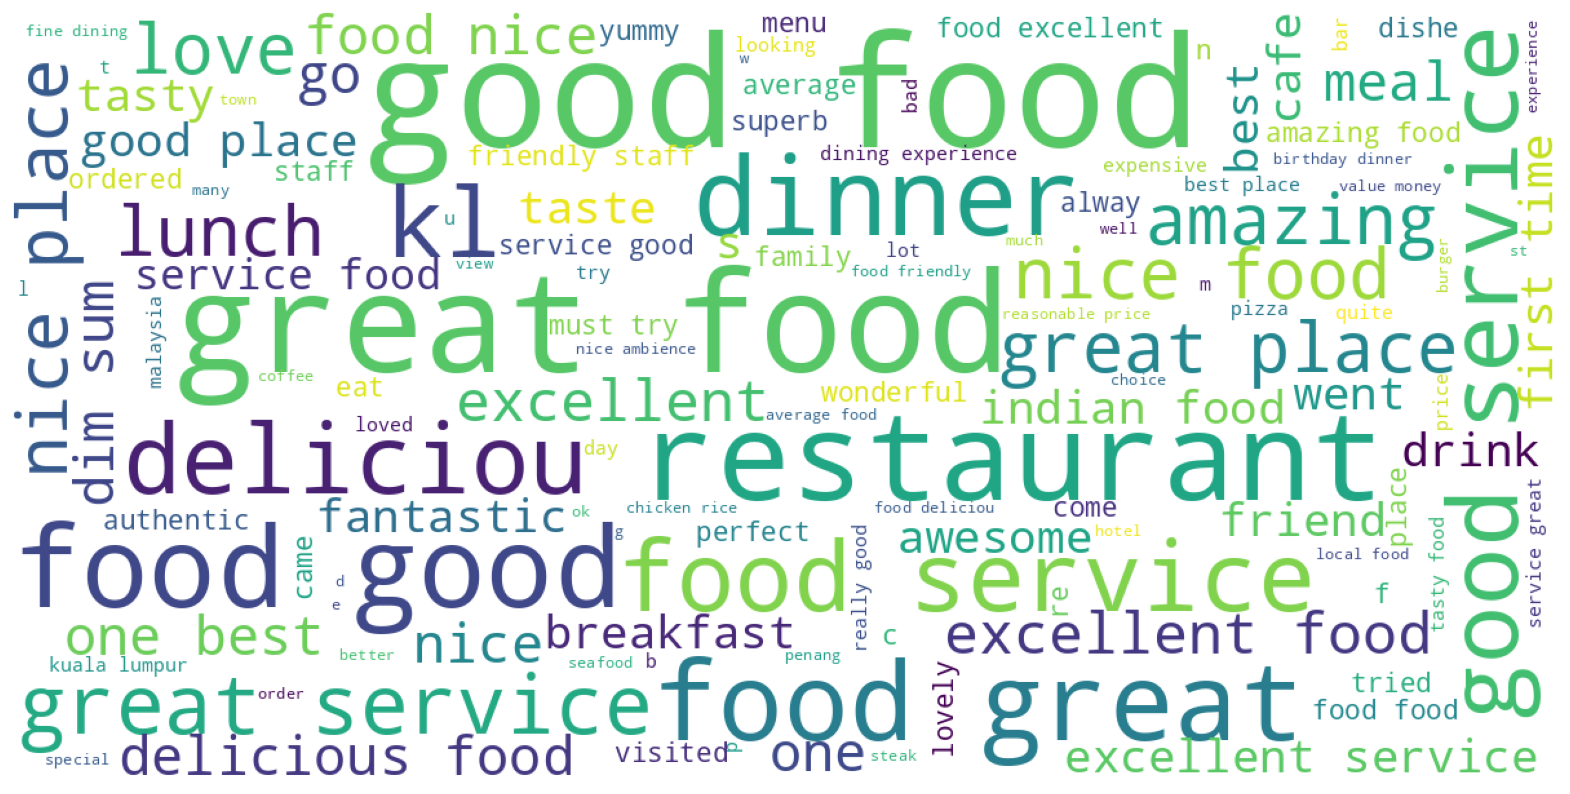

In [68]:
# print wordcloud
show_wordcloud(malay_reviews_3['Reviews_no_num'])

In [69]:
def word_cloud_plot(df, rating,title = None):
    comment_words = ' '
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40,
        scale = 3,
        random_state = 42
    ).generate(str(df))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

In [70]:
star_5_sample = malay_reviews_3[malay_reviews_3['Rating']==5].sample(n=5000)

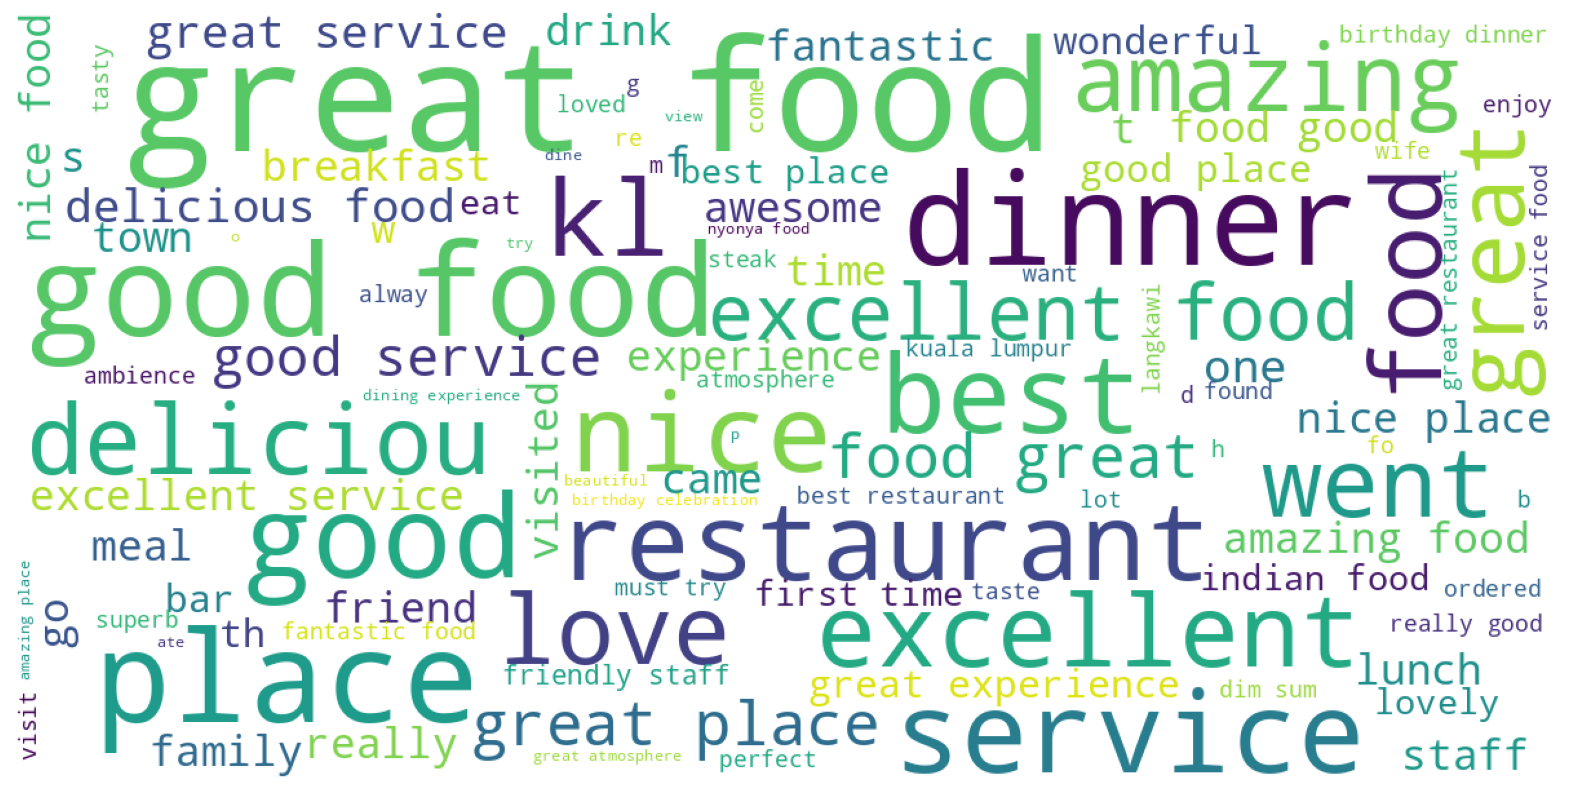

In [71]:
word_cloud_plot(df= star_5_sample , rating = 5)

In [72]:
star_5_sample = malay_reviews_3[malay_reviews_3['Rating']==5].sample(n=1000)

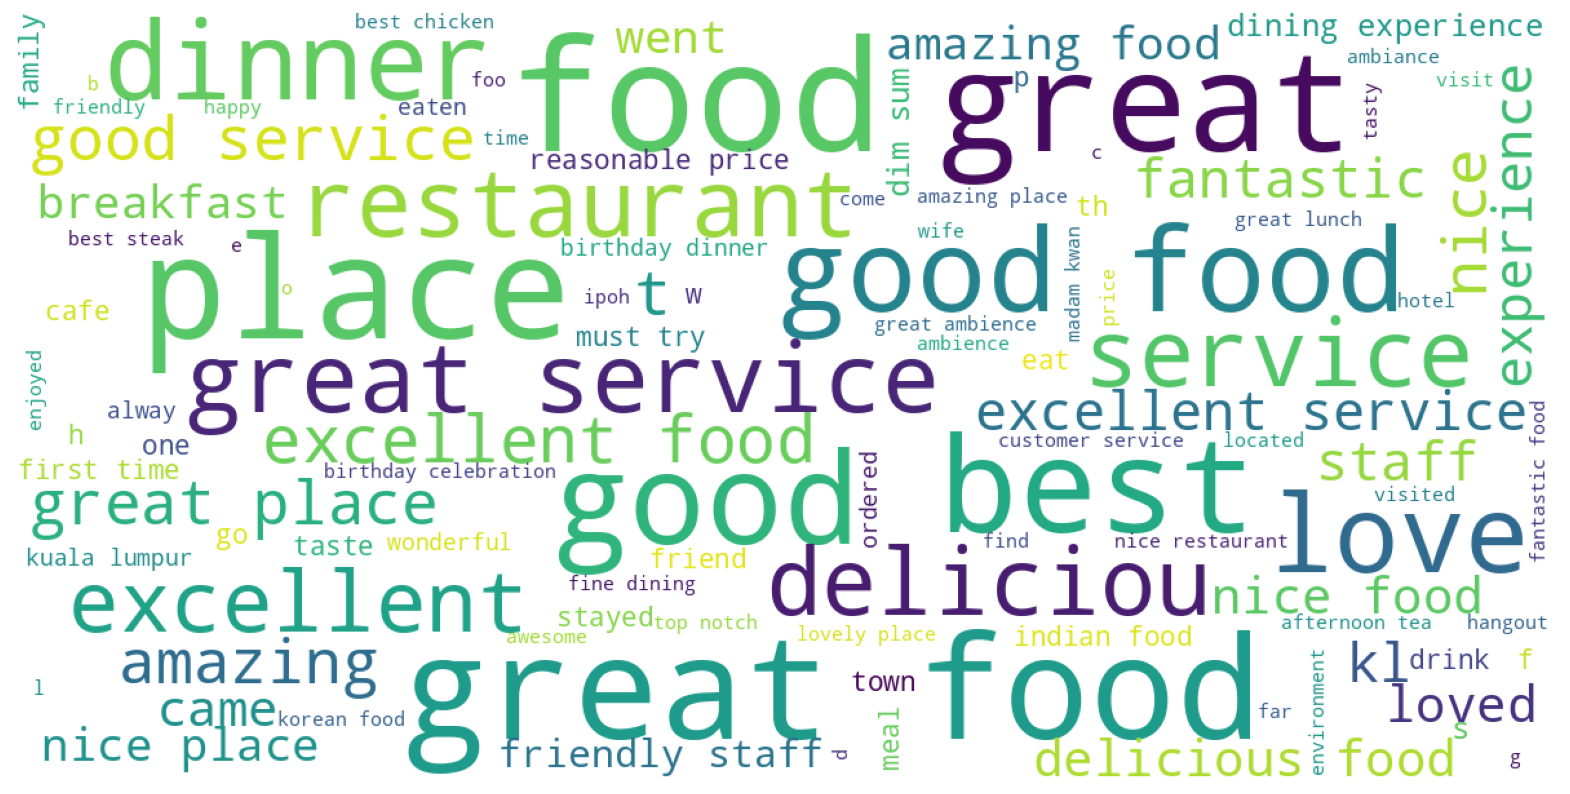

In [73]:
word_cloud_plot(df= star_5_sample , rating = 1)

### Ratings and Labels

In [74]:
malay_reviews_3.Rating.value_counts()

5.0    72605
4.0    40334
3.0    15070
2.0     5396
1.0     5100
Name: Rating, dtype: int64

In [75]:
# Encode labels with 1 to 3 as negative and 4 to 5 as positive
def encode_rating(rating):
    if rating >= 1 and rating <= 3:
        return 1
    else:
        return 0

In [76]:
malay_reviews_3['New_Rating'] = malay_reviews_3['Rating'].apply(encode_rating)
malay_reviews_3.head(3)

,Rating,New_Reviews,Review_Length,New_Reviews_1,Text_Lower,Reviews_no_url,Reviews_no_emoji,Reviews_no_punct,Reviews_no_stop,Reviews_no_num,New_Rating
0,5.0,"Chambers Bar and Grill. David, Thanga, Mikail ...",129,"Chambers Bar and Grill. David, Thanga, Mikail ...","chambers bar and grill. david, thanga, mikail ...","chambers bar and grill. david, thanga, mikail ...",chambers bar and grill david thanga mikail and...,chambers bar and grill david thanga mikail and...,chambers bar grill david thanga mikail chef st...,chambers bar grill david thanga mikail chef st...,0
1,5.0,Always a pleasure. Place to celebrate.. We vis...,317,Always a pleasure. Place to celebrate.. We vis...,always a pleasure. place to celebrate.. we vis...,always a pleasure. place to celebrate.. we vis...,always a pleasure place to celebrate we visite...,always a pleasure place to celebrate we visite...,always pleasure place celebrate visited family...,always pleasure place celebrate visited family...,0
2,5.0,Enjoying good service and good food after a lo...,338,Enjoying good service and good food after a lo...,enjoying good service and good food after a lo...,enjoying good service and good food after a lo...,enjoying good service and good food after a lo...,enjoying good service and good food after a lo...,enjoying good service good food long journey p...,enjoying good service good food long journey p...,0


## Lemmatization

In [77]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [78]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

malay_reviews_3['Lemmatised_Text'] = malay_reviews_3['Reviews_no_num'].apply(lambda text: lemmatize_words(text))

In [79]:
malay_reviews_3['Reviews_no_num'][0]

'chambers bar grill david thanga mikail chef steven gave brilliant service food excellent would recommend'

In [80]:
malay_reviews_3['Lemmatised_Text'][0]

'chamber bar grill david thanga mikail chef steven gave brilliant service food excellent would recommend'

__Split sentences into tokens__

In [81]:
tokenizer=nltk.tokenize.RegexpTokenizer(r'\w+')
malay_reviews_3['Lemmatised_Text_Tokens'] = malay_reviews_3['Lemmatised_Text'].apply(lambda x:tokenizer.tokenize(x))
malay_reviews_3['Lemmatised_Text_Tokens'][30]

['chamber',
 'grill',
 'excellent',
 'grill',
 'service',
 'staff',
 'adli',
 'azu',
 'david',
 'food',
 'great',
 'especially',
 'river',
 'prawn',
 'superb',
 'back']

In [82]:
malay_reviews_3.head(2)

,Rating,New_Reviews,Review_Length,New_Reviews_1,Text_Lower,Reviews_no_url,Reviews_no_emoji,Reviews_no_punct,Reviews_no_stop,Reviews_no_num,New_Rating,Lemmatised_Text,Lemmatised_Text_Tokens
0,5.0,"Chambers Bar and Grill. David, Thanga, Mikail ...",129,"Chambers Bar and Grill. David, Thanga, Mikail ...","chambers bar and grill. david, thanga, mikail ...","chambers bar and grill. david, thanga, mikail ...",chambers bar and grill david thanga mikail and...,chambers bar and grill david thanga mikail and...,chambers bar grill david thanga mikail chef st...,chambers bar grill david thanga mikail chef st...,0,chamber bar grill david thanga mikail chef ste...,"[chamber, bar, grill, david, thanga, mikail, c..."
1,5.0,Always a pleasure. Place to celebrate.. We vis...,317,Always a pleasure. Place to celebrate.. We vis...,always a pleasure. place to celebrate.. we vis...,always a pleasure. place to celebrate.. we vis...,always a pleasure place to celebrate we visite...,always a pleasure place to celebrate we visite...,always pleasure place celebrate visited family...,always pleasure place celebrate visited family...,0,always pleasure place celebrate visited family...,"[always, pleasure, place, celebrate, visited, ..."


__Count Words in Sentences__

In [83]:
malay_reviews_3['Final_no_of_words'] = malay_reviews_3['Lemmatised_Text_Tokens'].apply(lambda x:len(str(x).split()))
malay_reviews_3.head()

,Rating,New_Reviews,Review_Length,New_Reviews_1,Text_Lower,Reviews_no_url,Reviews_no_emoji,Reviews_no_punct,Reviews_no_stop,Reviews_no_num,New_Rating,Lemmatised_Text,Lemmatised_Text_Tokens,Final_no_of_words
0,5.0,"Chambers Bar and Grill. David, Thanga, Mikail ...",129,"Chambers Bar and Grill. David, Thanga, Mikail ...","chambers bar and grill. david, thanga, mikail ...","chambers bar and grill. david, thanga, mikail ...",chambers bar and grill david thanga mikail and...,chambers bar and grill david thanga mikail and...,chambers bar grill david thanga mikail chef st...,chambers bar grill david thanga mikail chef st...,0,chamber bar grill david thanga mikail chef ste...,"[chamber, bar, grill, david, thanga, mikail, c...",15
1,5.0,Always a pleasure. Place to celebrate.. We vis...,317,Always a pleasure. Place to celebrate.. We vis...,always a pleasure. place to celebrate.. we vis...,always a pleasure. place to celebrate.. we vis...,always a pleasure place to celebrate we visite...,always a pleasure place to celebrate we visite...,always pleasure place celebrate visited family...,always pleasure place celebrate visited family...,0,always pleasure place celebrate visited family...,"[always, pleasure, place, celebrate, visited, ...",32
2,5.0,Enjoying good service and good food after a lo...,338,Enjoying good service and good food after a lo...,enjoying good service and good food after a lo...,enjoying good service and good food after a lo...,enjoying good service and good food after a lo...,enjoying good service and good food after a lo...,enjoying good service good food long journey p...,enjoying good service good food long journey p...,0,enjoying good service good food long journey p...,"[enjoying, good, service, good, food, long, jo...",35
3,5.0,Great Steak for Couples. Had a great Tomahawk ...,253,Great Steak for Couples. Had a great Tomahawk ...,great steak for couples. had a great tomahawk ...,great steak for couples. had a great tomahawk ...,great steak for couples had a great tomahawk f...,great steak for couples had a great tomahawk f...,great steak couples great tomahawk hubby thank...,great steak couples great tomahawk hubby thank...,0,great steak couple great tomahawk hubby thanks...,"[great, steak, couple, great, tomahawk, hubby,...",25
4,5.0,Dining. Excellent ambient. Excellent service b...,125,Dining. Excellent ambient. Excellent service b...,dining. excellent ambient. excellent service b...,dining. excellent ambient. excellent service b...,dining excellent ambient excellent service by ...,dining excellent ambient excellent service by ...,dining excellent ambient excellent service dav...,dining excellent ambient excellent service dav...,0,dining excellent ambient excellent service dav...,"[dining, excellent, ambient, excellent, servic...",14


In [84]:
malay_reviews_3['Final_no_of_words'].describe()

count    138505.000000
mean         38.897209
std          31.717147
min           1.000000
25%          19.000000
50%          29.000000
75%          47.000000
max         834.000000
Name: Final_no_of_words, dtype: float64

In [85]:
# number of rows with text length = 0
print(len(malay_reviews_3[malay_reviews_3['Final_no_of_words']==0]))

0


## Checking the Lables in the Dataset

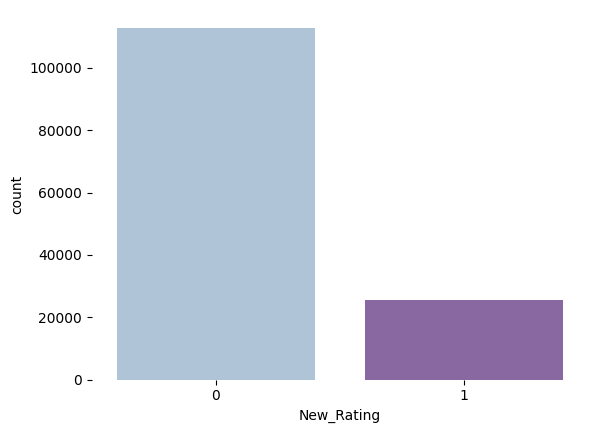

In [86]:
sns.countplot(x = 'New_Rating', data = malay_reviews_3,  palette = 'BuPu')
sns.despine(top = True, right = True, left = True, bottom = True)
plt.show()
plt.show()

## MODELLING

__Models to be implemented include:__
 1. Bi-LSTM
 2. Bi-LSTM with Word2vec
 3. Bi-LTSM with Glove
 4. BERT

In [87]:
from sklearn.model_selection import train_test_split
import tensorflow.keras
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [88]:
X = malay_reviews_3['Lemmatised_Text_Tokens']
y = malay_reviews_3['New_Rating']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

### Tokenizing the dataset

In [90]:
reviews = malay_reviews_3['Lemmatised_Text_Tokens'].values
reviews

array([list(['chamber', 'bar', 'grill', 'david', 'thanga', 'mikail', 'chef', 'steven', 'gave', 'brilliant', 'service', 'food', 'excellent', 'would', 'recommend']),
       list(['always', 'pleasure', 'place', 'celebrate', 'visited', 'family', 'celebration', 'usual', 'restaurant', 'disappoint', 'boy', 'love', 'bread', 'staff', 'obliged', 'giving', 'nd', 'serving', 'thanks', 'david', 'chef', 'aiman', 'esp', 'thanga', 'served', 'u', 'diligently', 'despite', 'busy', 'many', 'customer', 'time']),
       list(['enjoying', 'good', 'service', 'good', 'food', 'long', 'journey', 'perfect', 'dinner', 'long', 'journey', 'travelling', 'dk', 'kuala', 'lumpur', 'nice', 'arrive', 'hilton', 'dinner', 'chamber', 'bar', 'grill', 'perfect', 'service', 'david', 'thanga', 'good', 'steak', 'etc', 'prepared', 'chef', 'aiman', 'sure', 'visit', 'place']),
       ...,
       list(['breakfast', 'breakfast', 'good', 'plenty', 'variety', 'staff', 'quite', 'helpful', 'friendly', 'peak', 'time', 'prepared', 'wait', 's

In [91]:
unique_words = set(word for sentence in malay_reviews_3['Lemmatised_Text_Tokens'] for word in sentence)
num_unique_words = len(unique_words)
print(f"The total number of unique words in the 'Lemmatised_Text_Tokens' column is {num_unique_words}.")
print('There are {} unique text in the dataset.'.format(len(reviews)))

The total number of unique words in the 'Lemmatised_Text_Tokens' column is 65424.
There are 138505 unique text in the dataset.


In [92]:
max_length = 0
for sentence in malay_reviews_3['Lemmatised_Text_Tokens']:
    length = len(sentence)
    if length > max_length:
        max_length = length
print(f"The maximum number of words in a review in the 'Lemmatised_Text_Tokens' column is {max_length}.")

The maximum number of words in a review in the 'Lemmatised_Text_Tokens' column is 834.


In [93]:
tokenize = Tokenizer(num_words = 500)
tokenize.fit_on_texts(X_train)

In [94]:
X_train_lstm = tokenize.texts_to_sequences(X_train)
X_test_lstm = tokenize.texts_to_sequences(X_test)

print(len(X_train_lstm))

110804


In [95]:
X_train_lstm[2]

[4,
 3,
 39,
 1,
 47,
 154,
 52,
 42,
 114,
 223,
 1,
 3,
 21,
 17,
 1,
 30,
 55,
 268,
 173,
 281,
 19,
 68,
 55,
 138,
 13,
 52,
 168,
 62,
 359,
 52,
 19,
 6,
 255,
 29,
 185,
 427]

### Padding the dataset

In [96]:
# truncate and/or pad input sequences
max_review_length = 500
X_train_new_pad = sequence.pad_sequences(X_train_lstm, maxlen = max_review_length)
X_test_new_pad = sequence.pad_sequences(X_test_lstm, maxlen = max_review_length)

print(X_train_new_pad[1])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

## BI-LSTM

In [97]:
n_epochs = 20
batchsize = 64
embed_vector_length = 32

In [98]:
model_bi_lstm = Sequential()
model_bi_lstm.add(Embedding(5000,
                      embed_vector_length,
                      input_length = max_review_length))


model_bi_lstm.add(Bidirectional(LSTM(100)))
model_bi_lstm.add(Dense(1, activation='sigmoid'))
model_bi_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bi_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              106400    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 266,601
Trainable params: 266,601
Non-trainable params: 0
_________________________________________________________________


In [99]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
             EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

In [100]:
%%time
hist_bi_lstm = model_bi_lstm.fit(X_train_new_pad,
                                 y_train,
                                 epochs = n_epochs,
                                 batch_size=batchsize,
                                 callbacks=callbacks,
                                 verbose=1,
                                 validation_split = 0.2)

score_bi_lstm = model_bi_lstm.evaluate(X_test_new_pad, y_test, batch_size=batchsize)
print('Test score:', score_bi_lstm[0])
print('Test accuracy:', score_bi_lstm[1])

Epoch 1/20
1386/1386 [==============================] - 76s 48ms/step - loss: 0.3076 - accuracy: 0.8749 - val_loss: 0.2535 - val_accuracy: 0.9026 - lr: 0.0010
Epoch 2/20
1386/1386 [==============================] - 51s 36ms/step - loss: 0.2406 - accuracy: 0.9038 - val_loss: 0.2322 - val_accuracy: 0.9088 - lr: 0.0010
Epoch 3/20
1386/1386 [==============================] - 50s 36ms/step - loss: 0.2318 - accuracy: 0.9079 - val_loss: 0.2308 - val_accuracy: 0.9075 - lr: 0.0010
Epoch 4/20
1386/1386 [==============================] - 49s 35ms/step - loss: 0.2256 - accuracy: 0.9094 - val_loss: 0.2269 - val_accuracy: 0.9103 - lr: 0.0010
Epoch 5/20
1386/1386 [==============================] - 49s 36ms/step - loss: 0.2202 - accuracy: 0.9115 - val_loss: 0.2220 - val_accuracy: 0.9122 - lr: 0.0010
Epoch 6/20
1386/1386 [==============================] - 49s 35ms/step - loss: 0.2163 - accuracy: 0.9132 - val_loss: 0.2209 - val_accuracy: 0.9121 - lr: 0.0010
Epoch 7/20
1386/1386 [========================

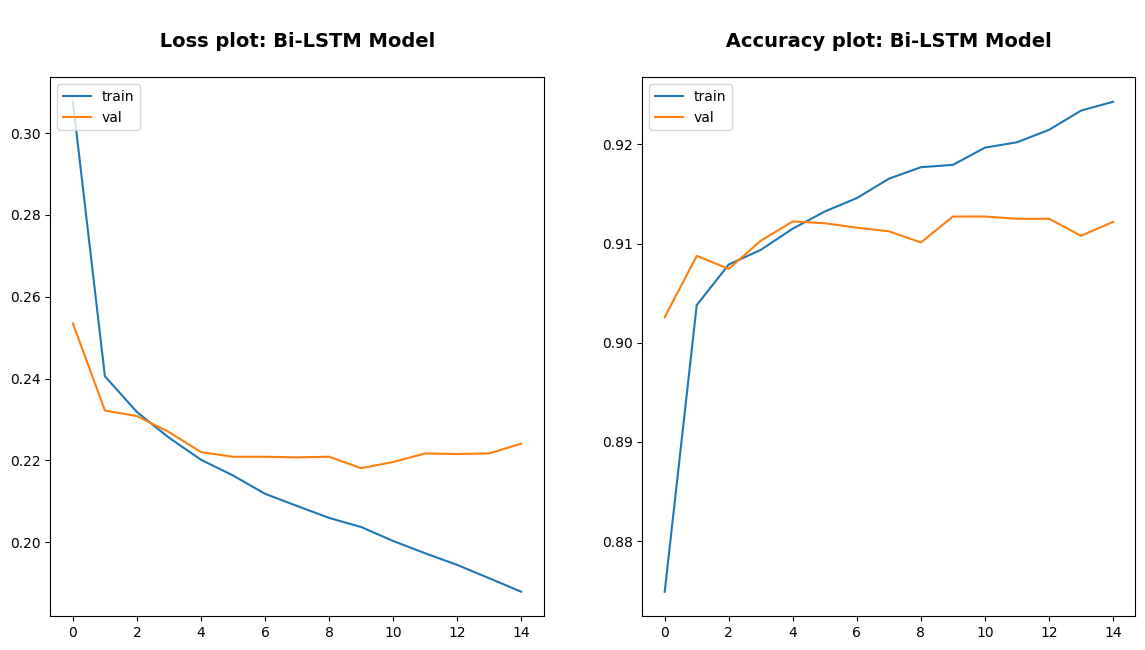

In [102]:
# Plotting Loss and Accuracy Graphs
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(hist_bi_lstm.history['loss'])
plt.plot(hist_bi_lstm.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.title('\n Loss plot: Bi-LSTM Model \n',fontsize = 14, fontweight = 'bold')

plt.subplot(1, 2, 2)
plt.plot(hist_bi_lstm.history['accuracy'])
plt.plot(hist_bi_lstm.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.title('\n Accuracy plot: Bi-LSTM Model \n',fontsize = 14, fontweight = 'bold')
plt.show()

In [103]:
y_pred_bi_lstm = model_bi_lstm.predict(X_test_new_pad)
y_pred_bi_lstm = np.where(y_pred_bi_lstm>=0.5, 1, 0)

866/866 [==============================] - 13s 15ms/step


In [104]:
print(classification_report(y_test,y_pred_bi_lstm))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     22571
           1       0.80      0.67      0.73      5130

    accuracy                           0.91     27701
   macro avg       0.87      0.82      0.84     27701
weighted avg       0.90      0.91      0.90     27701



<Figure size 640x480 with 0 Axes>

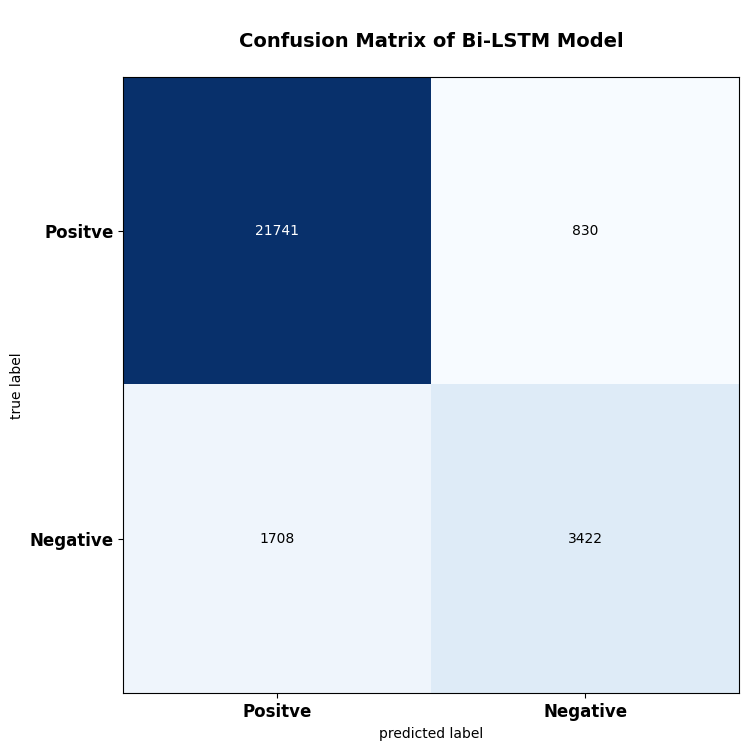

In [105]:
conf_matrix_bi_lstm = confusion_matrix(y_test, y_pred_bi_lstm)
plt.figure()
plot_confusion_matrix(conf_matrix_bi_lstm, figsize=(17,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2), ['Positve', 'Negative'], fontsize=12, fontweight = 'bold')
plt.yticks(range(2), ['Positve', 'Negative'], fontsize=12, fontweight = 'bold')
plt.title('\nConfusion Matrix of Bi-LSTM Model\n',fontsize = 14, fontweight = 'bold')
plt.show()

## GLOVE Embeddings

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [107]:
%%time
glove_embedding_file = '/content/drive/My Drive/Ortega - Covid/glove/Twitter/glove.twitter.27B.100d.txt'

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


In [108]:
%%time
def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype = "float32")
embeddings_index = dict(get_coefs(*g.rstrip().rsplit(" ")) for g in open(glove_embedding_file,encoding="utf-8"))

CPU times: user 27 s, sys: 799 ms, total: 27.8 s
Wall time: 28.5 s


In [109]:
%%time
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize,sent_tokenize
embeddings = np.stack(embeddings_index.values())
embedding_mean, embedding_std = embeddings.mean(), embeddings.std()
embedding_size = embeddings.shape[1]

word_index = tokenize.word_index
nb_words = min(max_review_length, len(word_index))

embedding_matrix = embedding_matrix = np.random.normal(embedding_mean, embedding_std, (nb_words, embedding_size))
for word, i in word_index.items():
    if i >= max_review_length:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

CPU times: user 1.3 s, sys: 272 ms, total: 1.57 s
Wall time: 1.56 s


## Bi-LSTM with GLOVE Embeddings

In [110]:
glove_embed_size = 100
maxlen = 500
model_bi_lstm_glove = Sequential()
model_bi_lstm_glove.add(Embedding(max_review_length,
                                  output_dim = glove_embed_size,
                                  weights = [embedding_matrix],
                                  input_length = max_review_length,
                                  trainable = False))

model_bi_lstm_glove.add(Bidirectional(LSTM(100, return_sequences=True)))
model_bi_lstm_glove.add(GlobalMaxPooling1D())
model_bi_lstm_glove.add(Dropout(0.2))
model_bi_lstm_glove.add(Dense(1, activation ='sigmoid'))
model_bi_lstm_glove.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


model_bi_lstm_glove.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 100)          50000     
                                                                 
 bidirectional_1 (Bidirectio  (None, 500, 200)         160800    
 nal)                                                            
                                                                 
 global_max_pooling1d (Globa  (None, 200)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 211,001
Trainable params: 161,001
Non-tr

In [111]:
%%time
hist_bi_lstm_glove = model_bi_lstm_glove.fit(X_train_new_pad,
                                             y_train,
                                             epochs = n_epochs,
                                             batch_size=batchsize,
                                             callbacks=callbacks,
                                             verbose=1,
                                             validation_split = 0.2)

score_bi_lstm_glove = model_bi_lstm_glove.evaluate(X_test_new_pad, y_test, batch_size=batchsize)
print('Test score:', score_bi_lstm_glove[0])
print('Test accuracy:', score_bi_lstm_glove[1])

Epoch 1/20
1386/1386 [==============================] - 54s 36ms/step - loss: 0.2709 - accuracy: 0.8892 - val_loss: 0.2364 - val_accuracy: 0.9056 - lr: 0.0010
Epoch 2/20
1386/1386 [==============================] - 50s 36ms/step - loss: 0.2313 - accuracy: 0.9073 - val_loss: 0.2215 - val_accuracy: 0.9106 - lr: 0.0010
Epoch 3/20
1386/1386 [==============================] - 49s 36ms/step - loss: 0.2194 - accuracy: 0.9118 - val_loss: 0.2162 - val_accuracy: 0.9133 - lr: 0.0010
Epoch 4/20
1386/1386 [==============================] - 49s 35ms/step - loss: 0.2109 - accuracy: 0.9162 - val_loss: 0.2137 - val_accuracy: 0.9153 - lr: 0.0010
Epoch 5/20
1386/1386 [==============================] - 49s 36ms/step - loss: 0.2018 - accuracy: 0.9201 - val_loss: 0.2116 - val_accuracy: 0.9151 - lr: 0.0010
Epoch 6/20
1386/1386 [==============================] - 49s 36ms/step - loss: 0.1935 - accuracy: 0.9232 - val_loss: 0.2104 - val_accuracy: 0.9147 - lr: 0.0010
Epoch 7/20
1386/1386 [========================

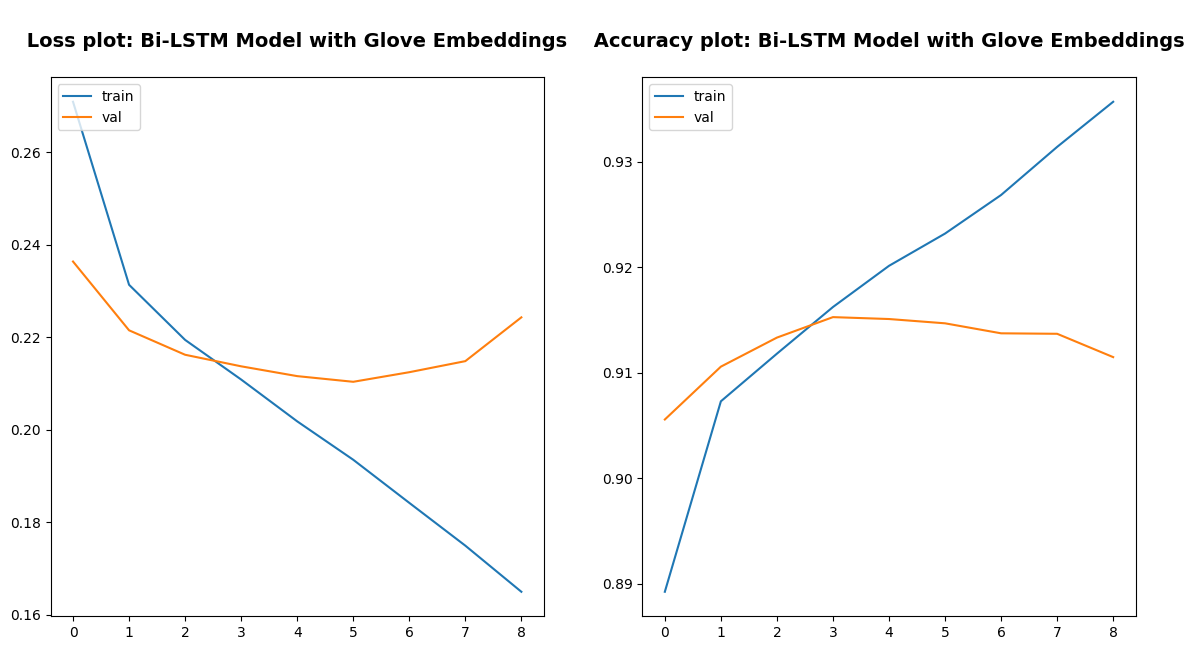

In [113]:
# Plotting Loss and Accuracy Graphs
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(hist_bi_lstm_glove.history['loss'])
plt.plot(hist_bi_lstm_glove.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.title('\n Loss plot: Bi-LSTM Model with Glove Embeddings \n',fontsize = 14, fontweight = 'bold')

plt.subplot(1, 2, 2)
plt.plot(hist_bi_lstm_glove.history['accuracy'])
plt.plot(hist_bi_lstm_glove.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.title('\n Accuracy plot: Bi-LSTM Model with Glove Embeddings \n',fontsize = 14, fontweight = 'bold')
plt.show()

In [114]:
y_pred_bi_lstm_glove = model_bi_lstm_glove.predict(X_test_new_pad)
y_pred_bi_lstm_glove = np.where(y_pred_bi_lstm_glove>=0.5, 1, 0)

866/866 [==============================] - 14s 15ms/step


In [115]:
print(classification_report(y_test,y_pred_bi_lstm_glove))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     22571
           1       0.75      0.75      0.75      5130

    accuracy                           0.91     27701
   macro avg       0.85      0.85      0.85     27701
weighted avg       0.91      0.91      0.91     27701



<Figure size 640x480 with 0 Axes>

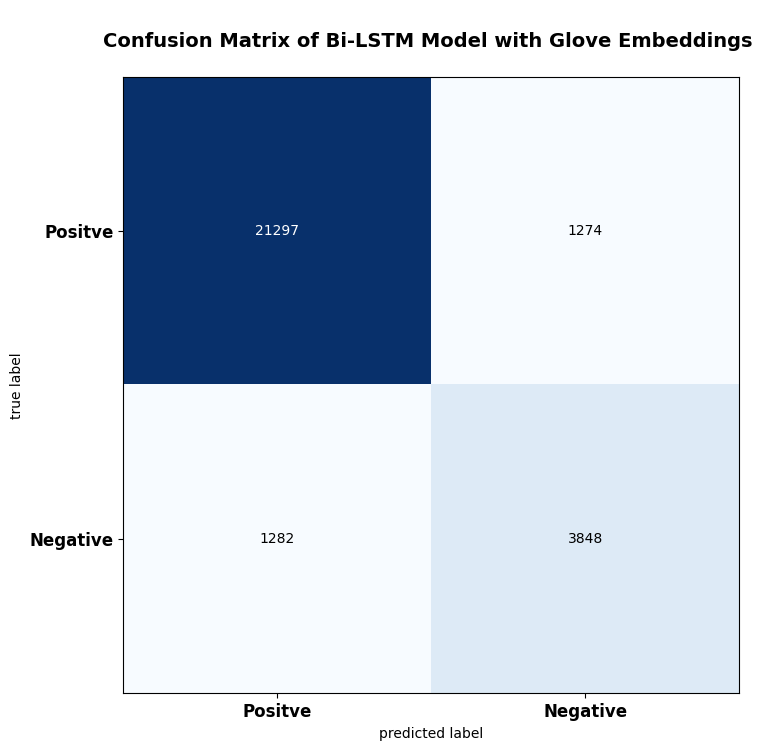

In [116]:
conf_matrix_bi_stm_glove = confusion_matrix(y_test, y_pred_bi_lstm_glove)
plt.figure()
plot_confusion_matrix(conf_matrix_bi_stm_glove, figsize=(17,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2), ['Positve', 'Negative'], fontsize=12, fontweight = 'bold')
plt.yticks(range(2), ['Positve', 'Negative'], fontsize=12, fontweight = 'bold')
plt.title('\nConfusion Matrix of Bi-LSTM Model with Glove Embeddings \n',fontsize = 14, fontweight = 'bold')
plt.show()

## Word2Vec Embeddings

In [117]:
from gensim.models import Word2Vec

In [118]:
Embedding_dimensions = 100

In [119]:
Word2vec_train_data = list(map(lambda x: x.split(), malay_reviews_3['Reviews_no_num']))

In [120]:
%%time

# Defining the model and training it.
word2vec_model = Word2Vec(Word2vec_train_data,
                 vector_size=Embedding_dimensions,
                 workers=8,
                 min_count=5)

print("Vocabulary Length:", len(word2vec_model.wv.key_to_index))

Vocabulary Length: 20331
CPU times: user 1min 12s, sys: 245 ms, total: 1min 12s
Wall time: 11.5 s


In [121]:
vocab_length = len(tokenize.word_index) + 1
tokenizer.num_words = vocab_length
print("Tokenizer vocab length:", vocab_length)

Tokenizer vocab length: 58207


In [122]:
embedding_matrix_w2v = np.zeros((vocab_length, Embedding_dimensions))

for word, token in tokenize.word_index.items():
    if word2vec_model.wv.__contains__(word):
        embedding_matrix_w2v[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix_w2v.shape)

Embedding Matrix Shape: (58207, 100)


## Bi-LSTM with Word2Vec Embeddings

In [123]:
model_bi_lstm_w2v = Sequential()
model_bi_lstm_w2v.add(Embedding(input_dim = vocab_length,
                                output_dim = Embedding_dimensions,
                                weights = [embedding_matrix_w2v],
                                input_length = max_review_length,
                                trainable=False))

model_bi_lstm_w2v.add(Bidirectional(LSTM(100, return_sequences=True)))
model_bi_lstm_w2v.add(GlobalMaxPooling1D())
model_bi_lstm_w2v.add(Dropout(0.2))
model_bi_lstm_w2v.add(Dense(1, activation ='sigmoid'))
model_bi_lstm_w2v.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


model_bi_lstm_w2v.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 100)          5820700   
                                                                 
 bidirectional_2 (Bidirectio  (None, 500, 200)         160800    
 nal)                                                            
                                                                 
 global_max_pooling1d_1 (Glo  (None, 200)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 5,981,701
Trainable params: 161,001
Non-

In [124]:
%%time
hist_bi_lstm_w2v = model_bi_lstm_w2v.fit(X_train_new_pad,
                                         y_train,
                                         epochs = n_epochs,
                                         batch_size=batchsize,
                                         callbacks=callbacks,
                                         verbose=1,
                                         validation_split = 0.2)

score_bi_lstm_w2v = model_bi_lstm_w2v.evaluate(X_test_new_pad, y_test, batch_size=batchsize)
print('Test score:', score_bi_lstm_w2v[0])
print('Test accuracy:', score_bi_lstm_w2v[1])

Epoch 1/20
1386/1386 [==============================] - 54s 36ms/step - loss: 0.2417 - accuracy: 0.9020 - val_loss: 0.2194 - val_accuracy: 0.9123 - lr: 0.0010
Epoch 2/20
1386/1386 [==============================] - 49s 35ms/step - loss: 0.2140 - accuracy: 0.9153 - val_loss: 0.2155 - val_accuracy: 0.9139 - lr: 0.0010
Epoch 3/20
1386/1386 [==============================] - 49s 35ms/step - loss: 0.2021 - accuracy: 0.9199 - val_loss: 0.2110 - val_accuracy: 0.9150 - lr: 0.0010
Epoch 4/20
1386/1386 [==============================] - 49s 35ms/step - loss: 0.1954 - accuracy: 0.9227 - val_loss: 0.2121 - val_accuracy: 0.9150 - lr: 0.0010
Epoch 5/20
1386/1386 [==============================] - 49s 35ms/step - loss: 0.1889 - accuracy: 0.9256 - val_loss: 0.2160 - val_accuracy: 0.9137 - lr: 0.0010
Epoch 6/20
1386/1386 [==============================] - 49s 36ms/step - loss: 0.1783 - accuracy: 0.9291 - val_loss: 0.2123 - val_accuracy: 0.9154 - lr: 0.0010
Epoch 7/20
1386/1386 [========================

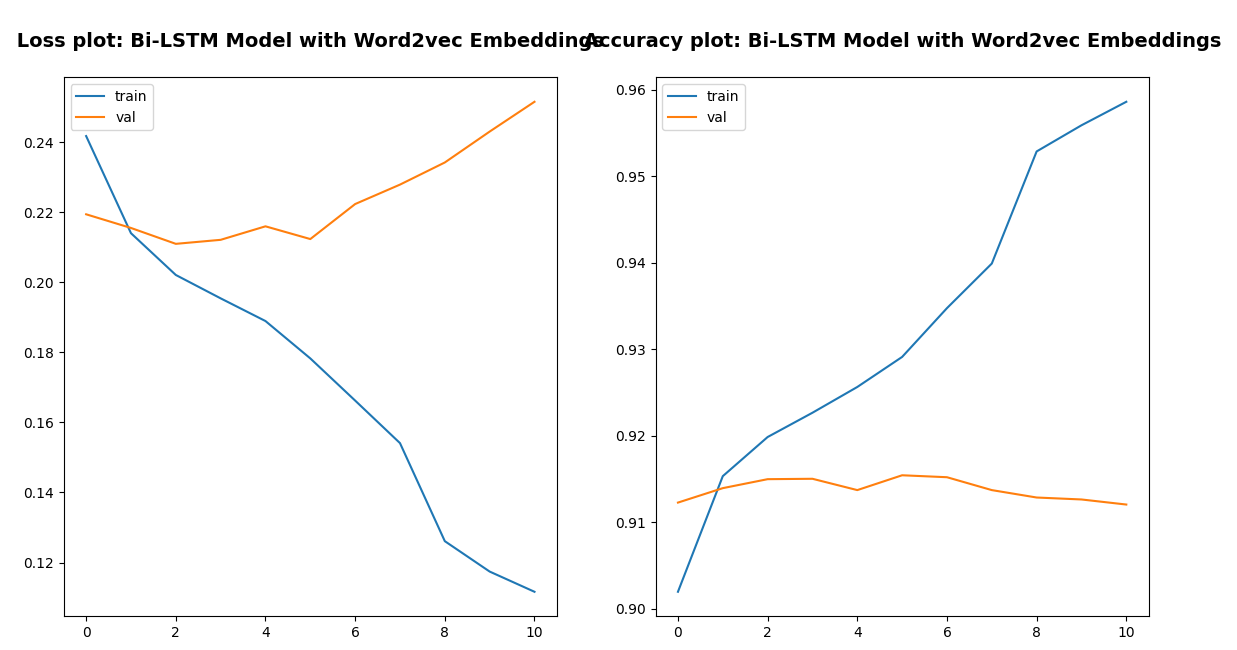

In [125]:
# Plotting Loss and Accuracy Graphs
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(hist_bi_lstm_w2v.history['loss'])
plt.plot(hist_bi_lstm_w2v.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.title('\n Loss plot: Bi-LSTM Model with Word2vec Embeddings \n',fontsize = 14, fontweight = 'bold')

plt.subplot(1, 2, 2)
plt.plot(hist_bi_lstm_w2v.history['accuracy'])
plt.plot(hist_bi_lstm_w2v.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.title('\n Accuracy plot: Bi-LSTM Model with Word2vec Embeddings \n',fontsize = 14, fontweight = 'bold')
plt.show()

In [126]:
y_pred_bi_lstm_w2v = model_bi_lstm_w2v.predict(X_test_new_pad)
y_pred_bi_lstm_w2v = np.where(y_pred_bi_lstm_w2v>=0.5, 1, 0)

866/866 [==============================] - 14s 15ms/step


In [127]:
print(classification_report(y_test,y_pred_bi_lstm_w2v))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     22571
           1       0.81      0.68      0.74      5130

    accuracy                           0.91     27701
   macro avg       0.87      0.82      0.84     27701
weighted avg       0.91      0.91      0.91     27701



<Figure size 640x480 with 0 Axes>

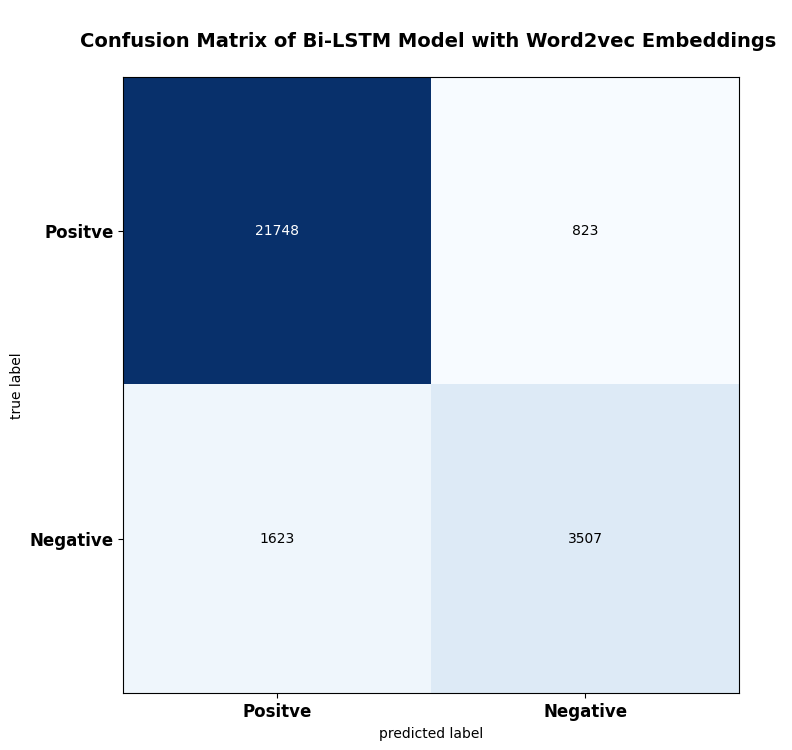

In [128]:
conf_matrix_bi_lstm_w2v = confusion_matrix(y_test, y_pred_bi_lstm_w2v)
plt.figure()
plot_confusion_matrix(conf_matrix_bi_lstm_w2v, figsize=(17,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2), ['Positve', 'Negative'], fontsize=12, fontweight = 'bold')
plt.yticks(range(2), ['Positve', 'Negative'], fontsize=12, fontweight = 'bold')
plt.title('\nConfusion Matrix of Bi-LSTM Model with Word2vec Embeddings \n',fontsize = 14, fontweight = 'bold')
plt.show()

### BERT
__Light data cleaning will be done before feeding the data into the model__

In [129]:
#Cleaning the data for BERT model
malay_reviews_3['New_Reviews_BERT'] = malay_reviews_3['New_Reviews'].apply(lambda x: remove_urls_html(x))
malay_reviews_3['New_Reviews_BERT'] = malay_reviews_3['New_Reviews_BERT'].apply(remove_emoji_symbols)
malay_reviews_3['New_Reviews_BERT'][20]

'Quick but amazing dinner service from a wonderful team. Had a quick dinner here while running some business errands.Ms. Azuraidah consistent with her wonderful service ever since my last visit in 2019, followed by Mr. David with his friendly vibe and charisma! Thanga was very attentive with service and always check in between my meal.I ordered a simple steak and a glass of beer, food and beverage were served on time and seasoning on the steak is on point. Kudos to Chef Steven and the kitchen team!Looking forward to return again with friends and family again!'

In [130]:
malay_reviews_3['New_Reviews'][20]

'Quick but amazing dinner service from a wonderful team. Had a quick dinner here while running some business errands.Ms. Azuraidah consistent with her wonderful service ever since my last visit in 2019, followed by Mr. David with his friendly vibe and charisma! Thanga was very attentive with service and always check in between my meal.I ordered a simple steak and a glass of beer, food and beverage were served on time and seasoning on the steak is on point. Kudos to Chef Steven and the kitchen team!Looking forward to return again with friends and family again!'

In [131]:
X_bert = malay_reviews_3['New_Reviews_BERT']
y_bert = malay_reviews_3['New_Rating']

In [134]:
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
import torch

In [135]:
#split the data
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(X_bert, y_bert, test_size=0.20, shuffle=True)

In [136]:
#tokenizing the data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [137]:
#Tokenize and preprocess training data
encoded_data = tokenizer.batch_encode_plus(
    X_train_bert,
    add_special_tokens=True,
    padding='max_length',
    max_length=128,
    return_attention_mask=True,
    return_tensors='pt',
    truncation=True
)

In [138]:
input_ids = encoded_data['input_ids']
attention_masks = encoded_data['attention_mask']
labels = torch.tensor(y_train_bert.to_numpy())

#DataLoader for training data
train_dataset = TensorDataset(input_ids, attention_masks, labels)
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)

#Initialize BERT model and optimizer
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
optimizer = AdamW(model.parameters(), lr=1e-5)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [139]:
import time

In [140]:
#Move model and data to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [141]:
#Training loop
model.train()
total_training_time = 0
epochs = 5

for epoch in range(epochs):
    start_time = time.time()
    for batch in train_dataloader:
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}
        outputs = model(**inputs)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    end_time = time.time()
    epoch_time = end_time - start_time
    total_training_time += epoch_time

    print(f"Epoch {epoch + 1} took {epoch_time:.2f} seconds")

print(f"Total training time: {total_training_time:.2f} seconds")

Epoch 1 took 724.33 seconds
Epoch 2 took 724.51 seconds
Epoch 3 took 724.36 seconds
Epoch 4 took 724.52 seconds
Epoch 5 took 724.55 seconds
Total training time: 3622.27 seconds


In [142]:
#Preprocess and tokenize test data
encoded_test_data = tokenizer.batch_encode_plus(
    X_test_bert,
    add_special_tokens=True,
    padding='max_length',
    max_length=128,
    return_attention_mask=True,
    return_tensors='pt',
    truncation=True
)
batch_size = 16
test_input_ids = encoded_test_data['input_ids']
test_attention_masks = encoded_test_data['attention_mask']
test_labels = torch.tensor(y_test_bert.to_numpy())

#Move test data to GPU
test_input_ids = test_input_ids.to(device)
test_attention_masks = test_attention_masks.to(device)
test_labels = test_labels.to(device)

In [143]:
#https://colab.research.google.com/notebooks/pro.ipynb
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [147]:
batch_size = 8
#DataLoader for test data
test_dataset = TensorDataset(test_input_ids, test_attention_masks, test_labels)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#Inference on test data
model.eval()
predicted_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        batch = tuple(t.to(device) for t in batch)
        test_inputs = {'input_ids': batch[0], 'attention_mask': batch[1]}
        logits = model(**test_inputs).logits
        predicted_labels.extend(np.argmax(logits.cpu().numpy(), axis=1))

predicted_labels = np.array(predicted_labels)

#classification report and confusion matrix
target_names = ['Positive', 'Negative']
print("Classification Report:\n", classification_report(y_test_bert, predicted_labels, target_names=target_names))

Classification Report:
               precision    recall  f1-score   support

    Positive       0.95      0.98      0.97     22506
    Negative       0.89      0.79      0.84      5195

    accuracy                           0.94     27701
   macro avg       0.92      0.88      0.90     27701
weighted avg       0.94      0.94      0.94     27701



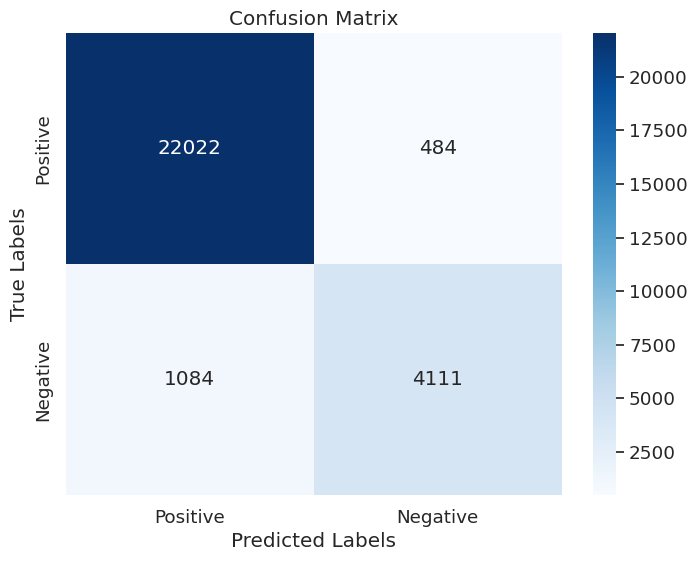

In [148]:
#confusion matrix
conf_matrix = confusion_matrix(y_test_bert, predicted_labels)

#class labels
class_labels = ['Positive', 'Negative']

#heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()